In [107]:

from matplotlib import font_manager, rc  # 한글사용 matplotlib
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import os
import csv
import codecs
import numpy as np
import json
from pandas import DataFrame as df

In [119]:
data=pd.read_csv('AFSNT.csv',encoding='CP949',header=1,
                names=['연','월','일','요일','공항','상대공항','항공사','편명','등록기호','출도착',\
                      '부정기타입','계획시각','실제시각','지연여부','지연사유','결항여부','결항사유'])

In [121]:
data['date']=pd.to_datetime(data['연'].apply(str)+'-'+
                            data['월'].apply(str)+'-'+
                            data['일'].apply(str))


#요일 변경 

data['wday'] = data.요일.map({
    '일': 0,
    '월': 1,
    '화': 2,
    '수': 3,
    '목': 4,
    '금': 5,
    '토': 6
})










In [129]:
list(data.계획시각)

TypeError: 'DataFrame' object is not callable

In [130]:
# 시간 범주화
def time_dicrete(stt):
    time_dic = []
    for i in range(len(stt)):
        st = int(stt[i].split(':')[0])*60 + int(stt[i].split(':')[1])
        if st >= 300 and st < 480:
            time_dic.append('5시-8시')
        elif st >= 480 and st < 660:
            time_dic.append('8시-11시')
        elif st >= 660 and st < 840:
            time_dic.append('11시-14시')
        elif st >= 840 and st < 1020:
            time_dic.append('14시-17시')
        elif st >= 1020 and st < 1200:
            time_dic.append('17시-20시')
        elif st >= 1200 and st < 1380:
            time_dic.append('20시-23시')
        elif st >=1380 or st<300:
            time_dic.append('23시-3시')
    return time_dic  

stt = data.계획시각

a = time_dicrete(stt)

In [131]:
data['시간대']=a


In [132]:
data

,연,월,일,요일,공항,상대공항,항공사,편명,등록기호,출도착,부정기타입,계획시각,실제시각,지연여부,지연사유,결항여부,결항사유,date,wday,시간대
0,2017,1,1,일,ARP3,ARP6,J,J1954,SEw3NzE4,A,N,9:30,9:31,N,NaN,N,NaN,2017-01-01,0,8시-11시
1,2017,1,1,일,ARP3,ARP6,J,J1956,SEw3NzE4,A,N,12:45,13:03,N,NaN,N,NaN,2017-01-01,0,11시-14시
2,2017,1,1,일,ARP3,ARP6,J,J1957,SEw3NzE4,D,N,13:25,14:09,Y,C02,N,NaN,2017-01-01,0,11시-14시
3,2017,1,1,일,ARP3,ARP6,J,J1958,SEw3NzE4,A,N,16:10,16:31,N,NaN,N,NaN,2017-01-01,0,14시-17시
4,2017,1,1,일,ARP3,ARP6,J,J1959,SEw3NTk5,D,N,16:45,17:21,Y,C02,N,NaN,2017-01-01,0,14시-17시
5,2017,1,1,일,ARP3,ARP6,J,J1960,SEw3NTk5,A,N,19:30,19:43,N,NaN,N,NaN,2017-01-01,0,17시-20시
6,2017,1,1,일,ARP3,ARP6,J,J1961,SEw3NTk5,D,N,20:35,20:52,N,NaN,N,NaN,2017-01-01,0,20시-23시
7,2017,1,1,일,ARP2,ARP3,J,J1015,SEw3NzA2,A,N,17:05,17:03,N,NaN,N,NaN,2017-01-01,0,17시-20시
8,2017,1,1,일,ARP1,ARP3,J,J1242,SEw3NzA2,D,N,20:25,20:36,N,NaN,N,NaN,2017-01-01,0,20시-23시
9,2017,1,1,일,ARP1,ARP3,J,J1257,SEw3NzA4,A,N,12:40,12:44,N,NaN,N,NaN,2017-01-01,0,11시-14시


In [133]:
# 지연여부가 N이지만 지연사유가 있는 경우
data.pivot_table(index='지연여부',aggfunc='count',values='지연사유')

,지연사유
지연여부,
N,0
Y,118937


In [134]:
#결항 데이터 제거
data2 =data[~(data['결항여부']=='Y')]

#지연여부 DL 인덱스 생성
dly = []
for i in data2.지연여부:
    if i =='Y':
        dly.append(1)
    elif i =='N':
        dly.append(0)
data2['DL']=dly

data2.isnull().sum()

c:\users\vldya\anaconda3\lib\site-packages\ipykernel_launcher.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  # This is added back by InteractiveShellApp.init_path()


연             0
월             0
일             0
요일            0
공항            0
상대공항          0
항공사           0
편명            0
등록기호          4
출도착           0
부정기타입         0
계획시각          0
실제시각          0
지연여부          0
지연사유     860512
결항여부          0
결항사유     979449
date          0
wday          0
시간대           0
DL            0
dtype: int64

In [135]:
#등록기호가 Null인 데이터
data2[data2['등록기호'].isnull()]

,연,월,일,요일,공항,상대공항,항공사,편명,등록기호,출도착,...,계획시각,실제시각,지연여부,지연사유,결항여부,결항사유,date,wday,시간대,DL
398528,2018,1,4,목,ARP11,ARP1,J,J1124T,NaN,A,...,10:10,10:10,N,NaN,N,NaN,2018-01-04,4,8시-11시,0
398529,2018,1,4,목,ARP11,ARP1,J,J1125T,NaN,D,...,11:00,11:00,N,NaN,N,NaN,2018-01-04,4,11시-14시,0
398530,2018,1,4,목,ARP11,ARP1,J,J1126T,NaN,A,...,14:10,14:10,N,NaN,N,NaN,2018-01-04,4,14시-17시,0
398531,2018,1,4,목,ARP11,ARP1,J,J1127T,NaN,D,...,15:00,15:00,N,NaN,N,NaN,2018-01-04,4,14시-17시,0


In [136]:
#데이터 제거
data2 =data2[~(data2['등록기호'].isnull())]

In [137]:
data2.isnull().sum()

연             0
월             0
일             0
요일            0
공항            0
상대공항          0
항공사           0
편명            0
등록기호          0
출도착           0
부정기타입         0
계획시각          0
실제시각          0
지연여부          0
지연사유     860508
결항여부          0
결항사유     979445
date          0
wday          0
시간대           0
DL            0
dtype: int64

In [138]:
data2.set_index('date',inplace=True)

air_df2017=data2['2017']
air_df2018=data2['2018']
air_df2019=data2['2019']

## 연도별 지연빈도

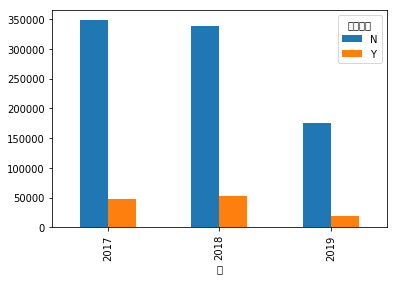

In [141]:
data2.pivot_table(index='연',columns='지연여부',aggfunc='count',values='DL').plot(kind='bar')

## 2017월별 지연빈도

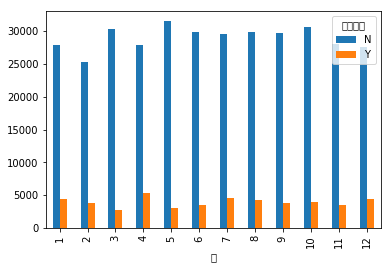

In [143]:
air_df2017.pivot_table(index='월',columns='지연여부',aggfunc='count',values='DL').plot(kind='bar')

## 2018월별 지연빈도

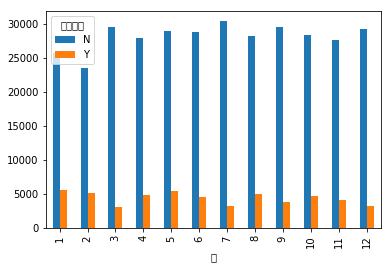

In [144]:
air_df2018.pivot_table(index='월',columns='지연여부',aggfunc='count',values='DL').plot(kind='bar')

## 2019월별 지연빈도

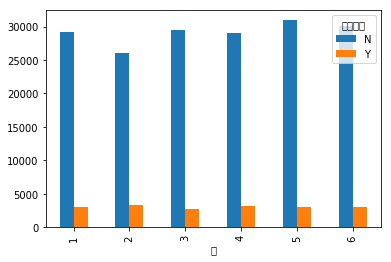

In [145]:
air_df2019.pivot_table(index='월',columns='지연여부',aggfunc='count',values='DL').plot(kind='bar')

## 요일별 지연빈도

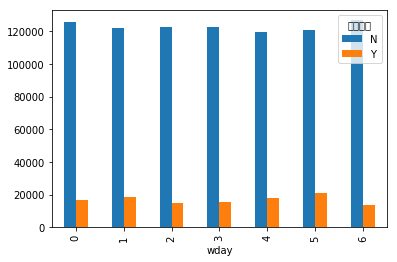

In [149]:
data2.pivot_table(index='wday',columns='지연여부',aggfunc='count',values='DL').plot(kind='bar')

## 일별 지연빈도

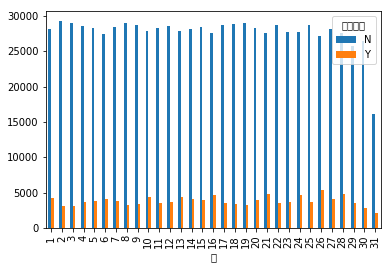

In [150]:
data2.pivot_table(index='일',columns='지연여부',aggfunc='count',values='DL').plot(kind='bar')

## 2017일별 지연빈도

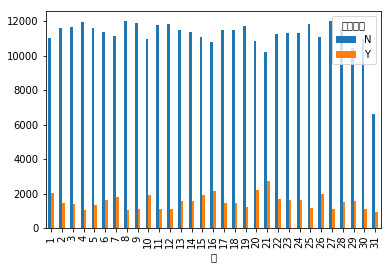

In [151]:
air_df2017.pivot_table(index='일',columns='지연여부',aggfunc='count',values='DL').plot(kind='bar')

## 2018일별 지연빈도

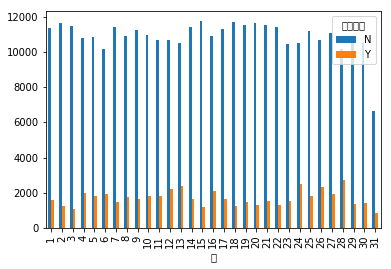

In [152]:
air_df2018.pivot_table(index='일',columns='지연여부',aggfunc='count',values='DL').plot(kind='bar')

## 2019일별 지연빈도

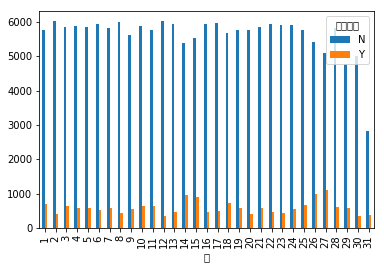

In [153]:
air_df2019.pivot_table(index='일',columns='지연여부',aggfunc='count',values='DL').plot(kind='bar')

## 시간대 별 지연빈도

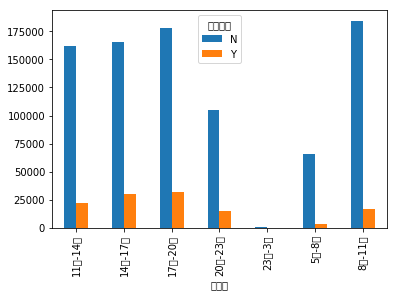

In [154]:
data2.pivot_table(index='시간대',columns='지연여부',aggfunc='count',values='DL').plot(kind='bar')

## 2017 시간대 별 지연빈도

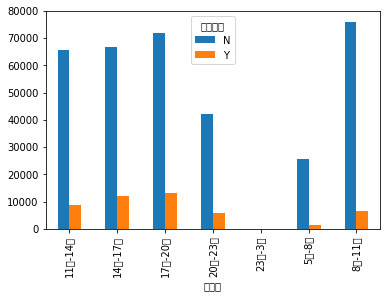

In [155]:
air_df2017.pivot_table(index='시간대',columns='지연여부',aggfunc='count',values='DL').plot(kind='bar')

## 2018 시간대 별 지연빈도

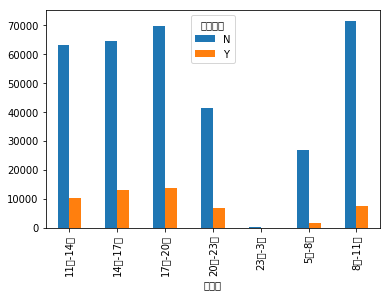

In [156]:
air_df2018.pivot_table(index='시간대',columns='지연여부',aggfunc='count',values='DL').plot(kind='bar')

## 2019 시간대 별 지연빈도

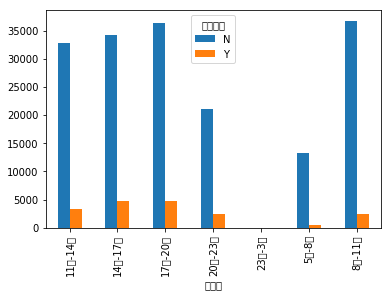

In [157]:
air_df2019.pivot_table(index='시간대',columns='지연여부',aggfunc='count',values='DL').plot(kind='bar')

출발지연 수

In [319]:
data2[(data2.DL==1)&(data2.출도착=='A')].pivot_table\
      (index='출도착',aggfunc='count',values='DL')

,DL
출도착,
A,33010


도착지연수

In [329]:
data2[(data2.DL==1)&(data2.출도착=='D')].pivot_table\
      (index='출도착',aggfunc='count',values='DL')

,DL
출도착,
D,85927


## 시간대별 운항 수 카운트

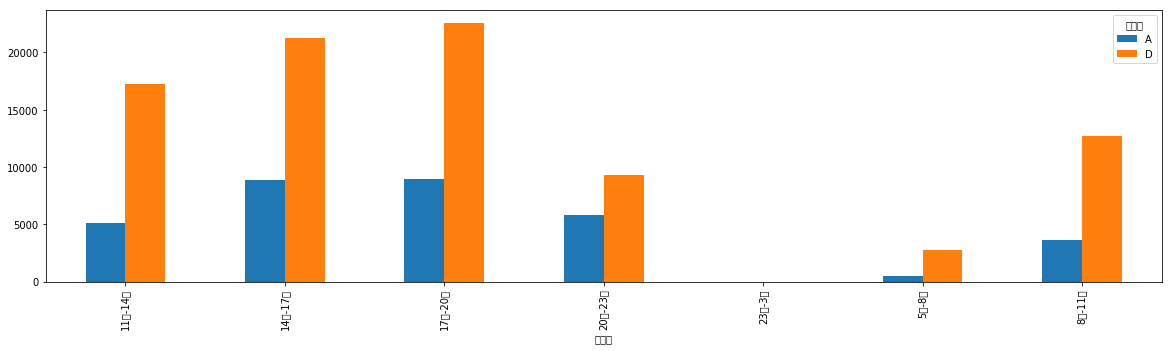

In [296]:
data2[data2.DL==1].pivot_table(index='시간대',columns='출도착',aggfunc='count',values='지연여부').plot(kind='bar')

In [159]:
import datetime
from datetime import datetime

In [164]:
stt=data2.실제시각[:]
att=data2.계획시각[:]

In [167]:
#실제시간과 스케줄 시간 차이 시각화


def time_difference(att,stt):
    time_dif = []
    for i in range(len(att)):
        at = int(att[i].split(':')[0])*60 + int(att[i].split(':')[1])
        st = int(stt[i].split(':')[0])*60 + int(stt[i].split(':')[1])
        time_dif.append(at-st)
    return time_dif

a= time_difference(att,stt)

In [185]:
att.reset_index(drop=True,inplace=True)
stt.reset_index(drop=True,inplace=True)

In [187]:
# 차이값 만들기
DF=pd.DataFrame([att,stt]).T
DF['DIF']=a

In [188]:
DF

,계획시각,실제시각,DIF
0,9:30,9:31,-1
1,12:45,13:03,-18
2,13:25,14:09,-44
3,16:10,16:31,-21
4,16:45,17:21,-36
5,19:30,19:43,-13
6,20:35,20:52,-17
7,17:05,17:03,2
8,20:25,20:36,-11
9,12:40,12:44,-4


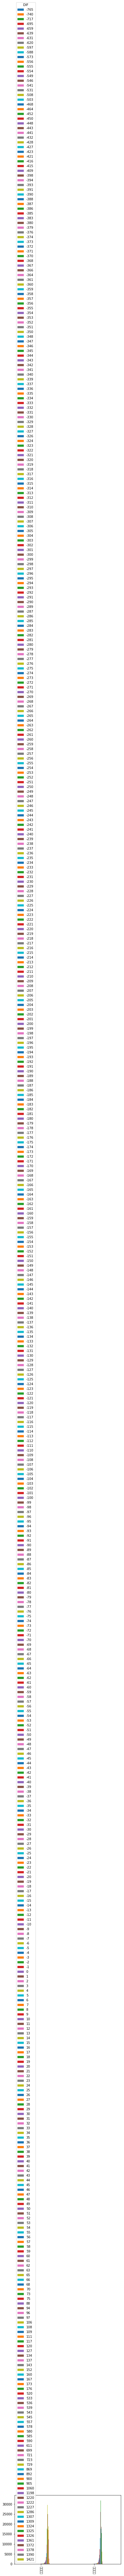

In [190]:
DF.pivot_table(columns='DIF',aggfunc='count').plot(kind='bar')

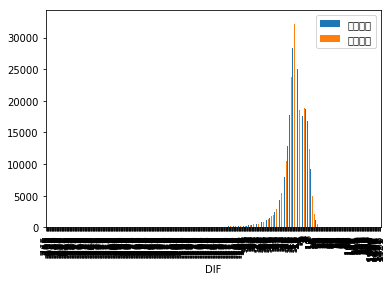

In [197]:
DF.pivot_table(index='DIF',aggfunc='count').plot(kind='bar')

In [198]:
DF.quantile([.1, .25, .5, .75], axis = 0)

,DIF
0.10,-34.0
0.25,-21.0
0.50,-12.0
0.75,-1.0


In [211]:
print("최소값:", DF.DIF.min())
print("최대값:", DF.DIF.max())

최소값: -765
최대값: 1421


In [212]:
DF_Q=DF[(DF>=-21)&(DF<=-1)]

## 1-3사분위수 지연 빈도

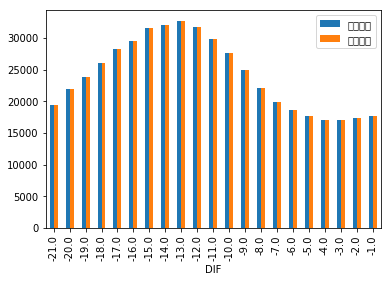

In [213]:
DF_Q.pivot_table(index='DIF',aggfunc='count').plot(kind='bar')

In [221]:
DF_D=DF[(DF>=-100)&(DF<=100)]
DF_P=DF[(DF>=0)&(DF<=100)]
DF_M=DF[(DF>=-100)&(DF<=0)]

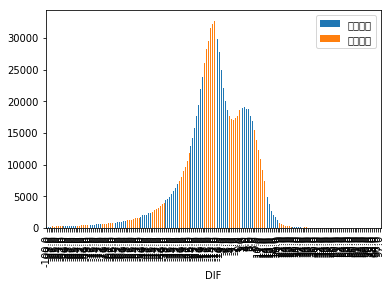

In [222]:
DF_D.pivot_table(index='DIF',aggfunc='count').plot(kind='bar')

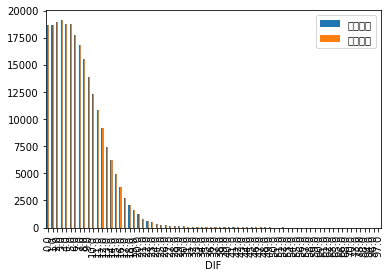

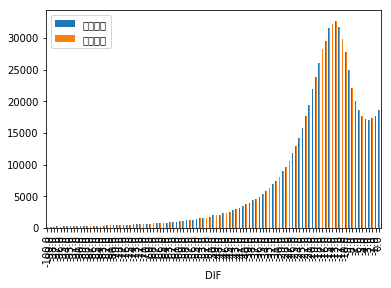

In [220]:
DF_P.pivot_table(index='DIF',aggfunc='count').plot(kind='bar')
DF_M.pivot_table(index='DIF',aggfunc='count').plot(kind='bar')

## 지연시간별 분포

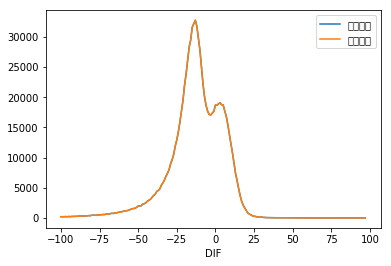

In [226]:
DF_D.groupby(['DIF']).count().plot()

In [229]:
data2

,연,월,일,요일,공항,상대공항,항공사,편명,등록기호,출도착,부정기타입,계획시각,실제시각,지연여부,지연사유,결항여부,결항사유,wday,시간대,DL
date,,,,,,,,,,,,,,,,,,,,
2017-01-01,2017,1,1,일,ARP3,ARP6,J,J1954,SEw3NzE4,A,N,9:30,9:31,N,NaN,N,NaN,0,8시-11시,0
2017-01-01,2017,1,1,일,ARP3,ARP6,J,J1956,SEw3NzE4,A,N,12:45,13:03,N,NaN,N,NaN,0,11시-14시,0
2017-01-01,2017,1,1,일,ARP3,ARP6,J,J1957,SEw3NzE4,D,N,13:25,14:09,Y,C02,N,NaN,0,11시-14시,1
2017-01-01,2017,1,1,일,ARP3,ARP6,J,J1958,SEw3NzE4,A,N,16:10,16:31,N,NaN,N,NaN,0,14시-17시,0
2017-01-01,2017,1,1,일,ARP3,ARP6,J,J1959,SEw3NTk5,D,N,16:45,17:21,Y,C02,N,NaN,0,14시-17시,1
2017-01-01,2017,1,1,일,ARP3,ARP6,J,J1960,SEw3NTk5,A,N,19:30,19:43,N,NaN,N,NaN,0,17시-20시,0
2017-01-01,2017,1,1,일,ARP3,ARP6,J,J1961,SEw3NTk5,D,N,20:35,20:52,N,NaN,N,NaN,0,20시-23시,0
2017-01-01,2017,1,1,일,ARP2,ARP3,J,J1015,SEw3NzA2,A,N,17:05,17:03,N,NaN,N,NaN,0,17시-20시,0
2017-01-01,2017,1,1,일,ARP1,ARP3,J,J1242,SEw3NzA2,D,N,20:25,20:36,N,NaN,N,NaN,0,20시-23시,0


In [263]:
# 공항별 지연

data2_DL = data2[data2.DL==1].pivot_table(index='공항',aggfunc='count',values='DL')
data2_ALL = data2.pivot_table(index='공항',aggfunc='count',values='DL')
data2_DL.reset_index(inplace=True)
data2_ALL.reset_index(inplace=True)
data2_POR = pd.merge(data2_DL,data2_ALL,on='공항')
data2_POR.columns = ['공항','지연여부','COUNT']
data2_POR['DLY_POR'] = data2_POR.지연여부/data2_POR.COUNT

data2_POR['AVG']=118937/868772
data2_POR.sort_values(by='DLY_POR',ascending=False)

,공항,지연여부,COUNT,DLY_POR,AVG
4,ARP13,640,4106,0.155869,0.136902
8,ARP3,58693,390867,0.150161,0.136902
6,ARP15,1719,13618,0.126230,0.136902
11,ARP6,3979,34314,0.115959,0.136902
13,ARP8,3746,32917,0.113801,0.136902
9,ARP4,3513,33461,0.104988,0.136902
0,ARP1,32129,307892,0.104352,0.136902
7,ARP2,12081,120636,0.100144,0.136902
3,ARP12,409,4759,0.085942,0.136902
1,ARP10,1,12,0.083333,0.136902


In [255]:
fig = plt.gcf()
fig.set_size_inches(18.5, 10.5)

plt.rcParams["figure.figsize"] = (20,5)

<Figure size 1332x756 with 0 Axes>

## 공항별 지연 수

<BarContainer object of 15 artists>

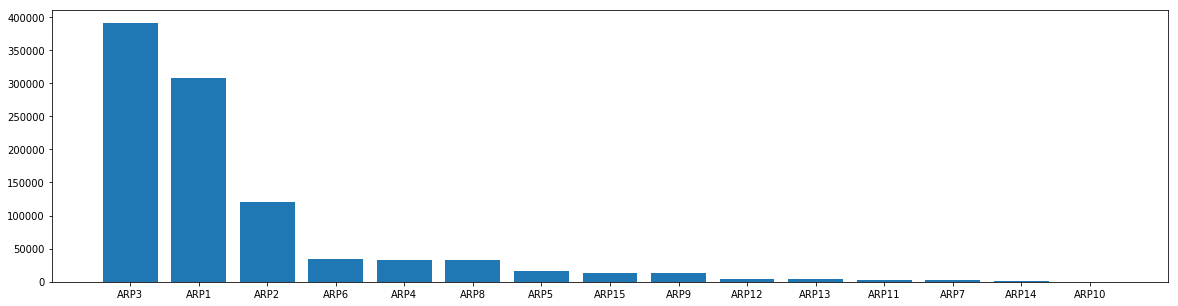

In [279]:
data2_POR= data2_POR.sort_values('COUNT',ascending=False)
data2_POR['AVG']=118937/15
plt.bar(data2_POR.공항,data2_POR.COUNT)

<BarContainer object of 15 artists>

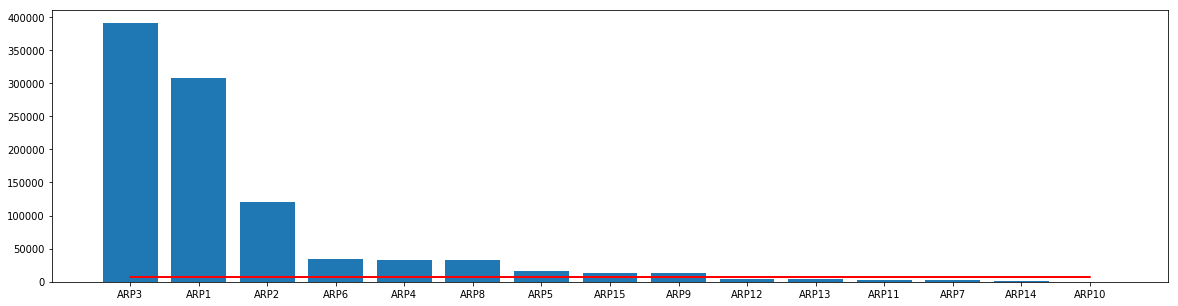

In [283]:
fig,ax=plt.subplots()
ax.plot(data2_POR.AVG,color='R')
ax.bar(data2_POR.공항,data2_POR.COUNT)

지연수 평균 추가

## 공항별 지연율

<BarContainer object of 15 artists>

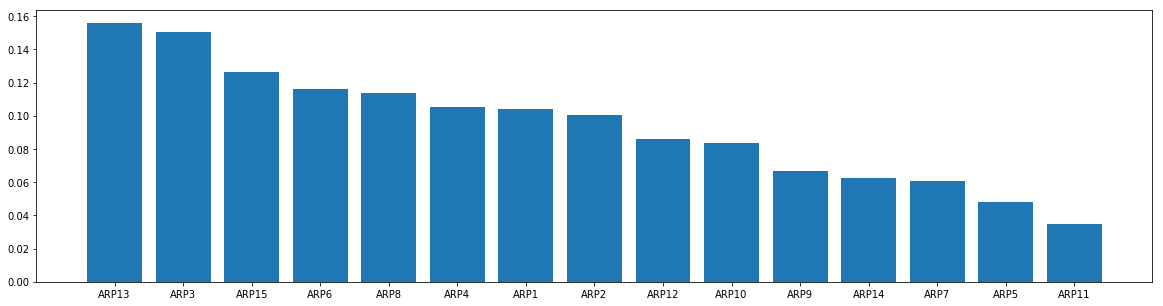

In [273]:
data2_POR= data2_POR.sort_values('DLY_POR',ascending=False)
plt.bar(data2_POR.공항,data2_POR.DLY_POR)

<BarContainer object of 15 artists>

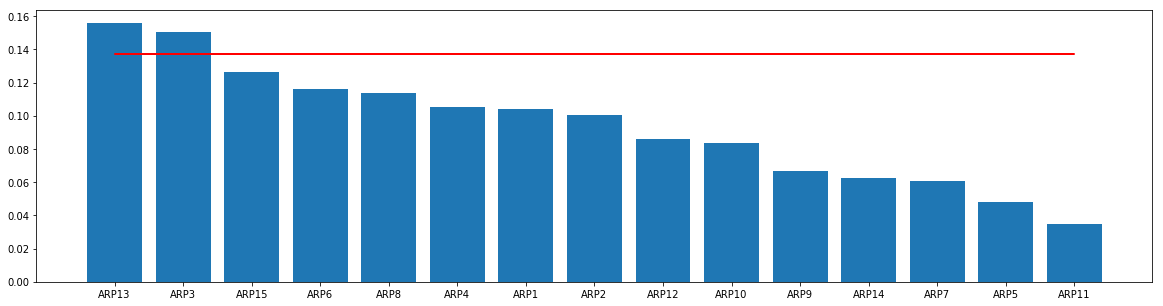

In [277]:

fig,ax=plt.subplots()
ax.plot(data2_POR.AVG,color='R')
ax.bar(data2_POR.공항,data2_POR.DLY_POR)

지연율 평균 추가

# 협의 / 결정 필요 사항
 1.  데이터 부분
    - 요청변수: 
    1. 요청 URL :
    1. api key:
    - 요청결과:
    1. hsrrlManageN : 사료 관리 번호 
    1. hsrriNo : 사료 번